# Friedman test 

In [6]:
import numpy as np
np.array([[0.78,0.78,0.77,0.77,0.77,0.78,0.78],
[0.80,0.79,0.80,0.80,0.80,0.79,0.80],
[0.80,0.80,0.80,0.80,0.80,0.80,0.80]]).T

array([[0.78, 0.8 , 0.8 ],
       [0.78, 0.79, 0.8 ],
       [0.77, 0.8 , 0.8 ],
       [0.77, 0.8 , 0.8 ],
       [0.77, 0.8 , 0.8 ],
       [0.78, 0.79, 0.8 ],
       [0.78, 0.8 , 0.8 ]])

In [7]:
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import pandas as pd
model_names = ['MNB', 'LSVM', 'LR'] #columns
measures = ["Accuracy","Precision_C1","Recall_C1","F1-score_C1","Precision_C2","Recall_C2","F1-score_C2"] #rows
            
accuracies = np.array([
       [0.78, 0.8 , 0.8 ],
       [0.78, 0.79, 0.8 ],
       [0.77, 0.8 , 0.8 ],
       [0.77, 0.8 , 0.8 ],
       [0.77, 0.8 , 0.8 ],
       [0.78, 0.79, 0.8 ],
       [0.78, 0.8 , 0.8 ]])


# Perform the Friedman's test
statistic, p_value = friedmanchisquare(*(accuracies.T))
print("Friedman's test statistic:", statistic)
print("p-value:", p_value)
pd.DataFrame(accuracies,columns=model_names,index=measures )

Friedman's test statistic: 13.130434782608686
p-value: 0.0014085177181167655


,MNB,LSVM,LR
Accuracy,0.78,0.80,0.8
Precision_C1,0.78,0.79,0.8
Recall_C1,0.77,0.80,0.8
F1-score_C1,0.77,0.80,0.8
Precision_C2,0.77,0.80,0.8
Recall_C2,0.78,0.79,0.8
F1-score_C2,0.78,0.80,0.8


The Friedman's test statistic of 13.13 and the p-value of 0.0014 suggest that there is a significant difference in the performance of the classifiers.
Looking at the performance metrics of the three classifiers, it appears that LSVM and LR have similar performance with an accuracy of 0.80 and F1-score of 0.8 for both classes. MNB has slightly lower performance with an accuracy of 0.78 and F1-score of 0.77 for both classes.

# Nemenyi test 

In [10]:
# Conduct the Nemenyi post-hoc test
nemenyi = sp.posthoc_nemenyi_friedman(accuracies)
nemenyi.columns = model_names
nemenyi.index = model_names
nemenyi

,MNB,LSVM,LR
MNB,-1.000000,0.029915,0.005998
LSVM,0.029915,-1.000000,0.837739
LR,0.005998,0.837739,-1.000000


This table is a Nemenyi matrix, which is a post-hoc test used to perform pairwise comparisons of classifiers after rejecting the null hypothesis of Friedman's test.

The values in the matrix represent the critical distance between pairs of classifiers, which is the minimum difference in rank that needs to be observed for the two classifiers to be considered statistically significantly different.

In the matrix, the diagonal values are always equal to -1 since the critical distance between a classifier and itself is zero. The values above and below the diagonal are mirrored since the comparison between classifier A and classifier B is equivalent to the comparison between classifier B and classifier A.

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x25235f3ed90>)

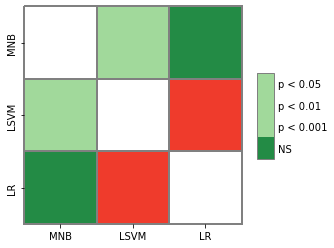

In [12]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(nemenyi, **heatmap_args)

Looking at the matrix, the largest critical distance is between MNB and LR, which is 0.005998. This suggests that MNB and LR are significantly different in terms of performance. The critical distance between MNB and LSVM is 0.029915, which is smaller than the critical distance between MNB and LR, indicating that MNB and LSVM are less significantly different than MNB and LR. Finally, the critical distance between LSVM and LR is 0.837739, which is the largest value in the matrix and indicates that LSVM and LR are not significantly different in terms of performance.